In [1]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="paper", style="whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

sys.path.append("reflutils")
import reflutils as ru
from runfile import *

# macro_folder = make_macro_folder()

# Data Processing

In [2]:
# Energy Sorter
# ru.main()  # make asynchronous, waiting function that is ran by scripting

c:\Users\hduva\CarbonLab\reflutils\src\reflutils\refl_manager.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col].iloc[:meanCutoff] = mean[col]
c:\Users\hduva\CarbonLab\reflutils\src\reflutils\refl_manager.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col].iloc[:meanCutoff] = mean[col]
c:\Users\hduva\CarbonLab\reflutils\src\reflutils\refl_manager.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc

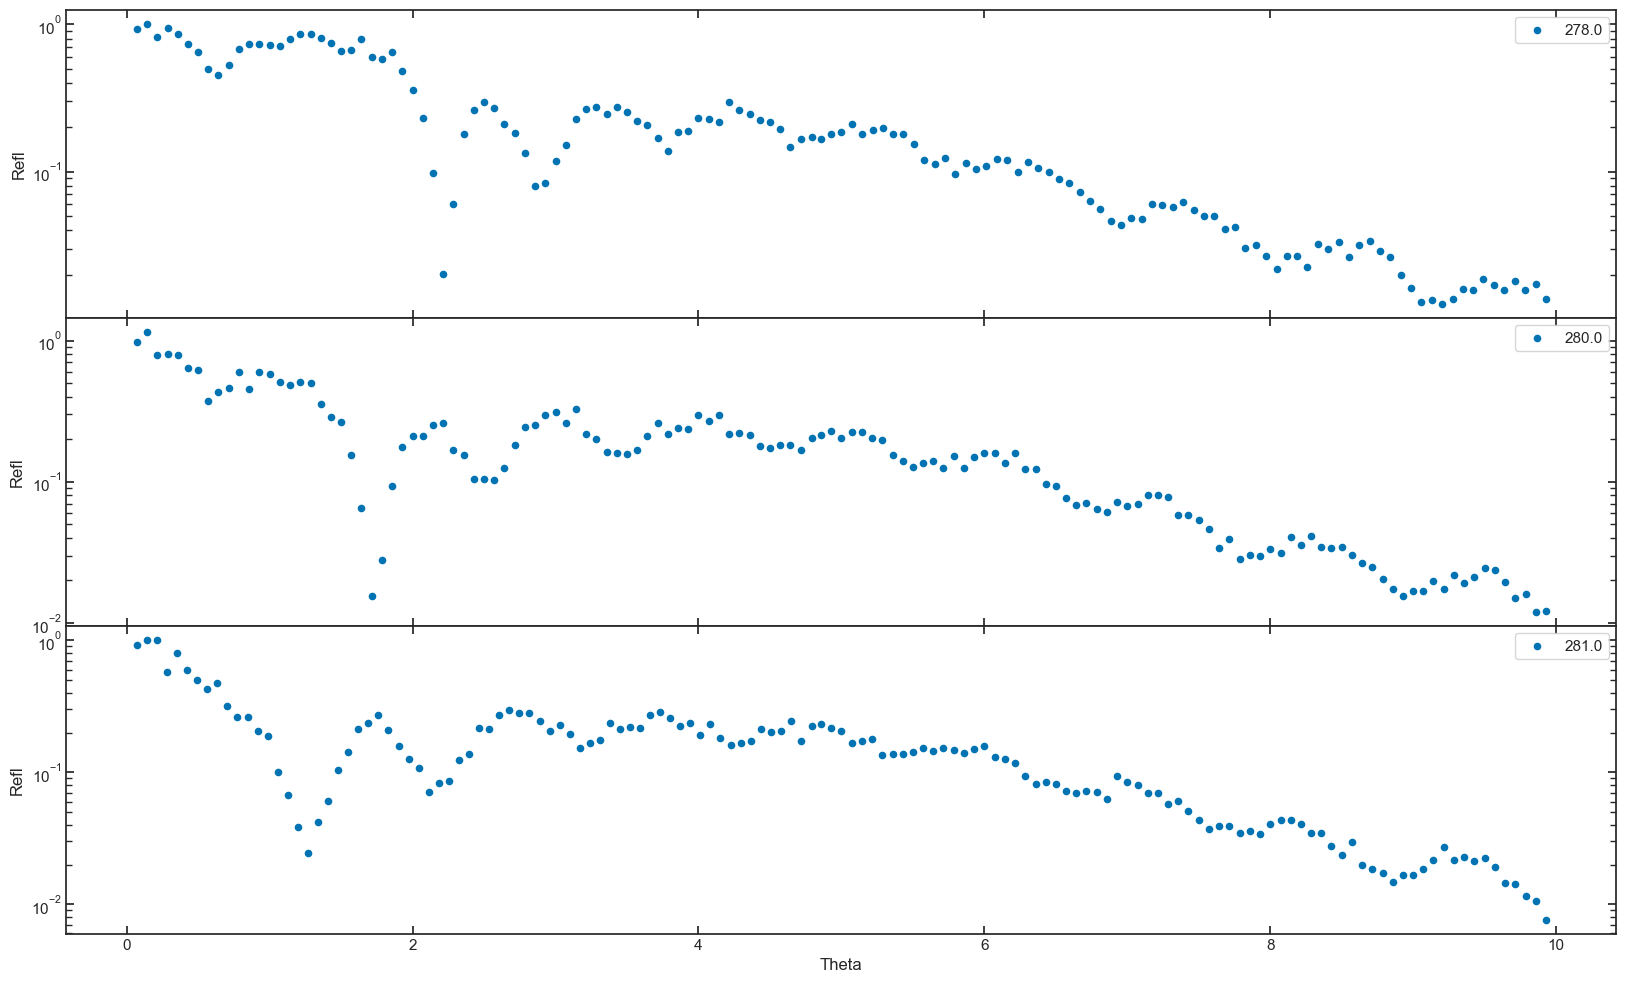

In [13]:
def multi_en_ploting():
    scan_number = ru.FileDialog.getDirectory()
    en = [en for en in scan_number.iterdir() if en.is_dir()]
    fig, ax = plt.subplots(
        nrows=len(en),
        figsize=(20, 4 * len(en)),
        sharex=True,
        gridspec_kw={"wspace": 0, "hspace": 0},
    )
    for e in en:
        file = scan_number / e / "100.0"
        data = ru.Refl(path=file).refl
        data.plot(
            x="Theta",
            y="Refl",
            ax=ax[en.index(e)],
            label=e.name,
            logy=True,
            kind="scatter",
        )


multi_en_ploting()